Neural Networks and Deep Learning: Lab Assignment 2

1) (a)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset

from keras.datasets import fashion_mnist
import tensorflow as tf
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Data Preprocessing
from tensorflow.keras.utils import to_categorical

X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
X_valid = X_valid.reshape(X_valid.shape[0], 28,28,1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

Model 1 and time taken to train the model

In [ ]:
# CNN Model 1 : (conv + pool + FC + output FC layer) with 1 Conv layer and 1 Maxpooling layer and No regularization
import time

start = time.time()

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model1 = model.fit(X_train, y_train, epochs = 10, batch_size = 500, validation_data = (X_valid, y_valid),verbose=0)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Total training time: 0.33407073418299355 minutes.


Model 2 and time taken to train the model

In [ ]:
# CNN Model 2 : (conv + pool + FC + output FC layer) with 1 Conv layer and 1 Maxpooling layer and L2 Regularization
import time

start = time.time()

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import regularizers

model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (28,28,1),  kernel_regularizer = regularizers.l2(0.00001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model2 = model.fit(X_train, y_train, epochs = 10, batch_size = 500, validation_data = (X_valid, y_valid),verbose=0)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Total training time: 0.1790700912475586 minutes.


Model 3 and time taken to train the model

In [ ]:
# CNN Model 3 : (conv + pool + FC + output FC layer) with 1 Conv layer and 1 Maxpooling layer and Dropout
import time

start = time.time()

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model3 = model.fit(X_train, y_train, epochs = 10, batch_size = 500, validation_data = (X_valid, y_valid),verbose=0)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               540900    
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

Model 4 and time taken to train the model

In [ ]:
# CNN Model 4 : (conv + pool + FC + output FC layer) with 1 Conv layer and 1 Maxpooling layer and Batch normalization
import time

start = time.time()

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model4 = model.fit(X_train, y_train, epochs = 10, batch_size = 500, validation_data = (X_valid, y_valid),verbose=0)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               540900    
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 100)               400       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 542,630
Trainable params: 542,430
Non-trainable params: 200
______________________________________________

Model 5 and time taken to train the model

In [ ]:
# CNN Model 5 : (conv + pool + FC + output FC layer) with 2 Conv layer and 2 Maxpooling layer and No regularization
import time

start = time.time()

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, kernel_size = 6, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size = 6, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model5 = model.fit(X_train, y_train, epochs = 10, batch_size = 500, validation_data = (X_valid, y_valid),verbose=0)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 23, 23, 32)        1184      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 32)          36896     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               28900     
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

Model 6 and time taken to train the model

In [ ]:
# CNN Model 6 : (conv + pool + FC + output FC layer) with 2 Conv layers and 2 Maxpooling layers and L2 Regularization
import time

start = time.time()

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import regularizers

model = Sequential()

model.add(Conv2D(32, kernel_size = 6, activation = 'relu', input_shape = (28,28,1),  kernel_regularizer = regularizers.l2(0.00001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size = 6, activation = 'relu', input_shape = (28,28,1), kernel_regularizer = regularizers.l2(0.00001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model6 = model.fit(X_train, y_train, epochs = 10, batch_size = 500, validation_data = (X_valid, y_valid),verbose=0)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 23, 23, 32)        1184      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 32)          36896     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               28900     
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

Model 7 and time taken to train the model

In [ ]:
# CNN Model 7 : (conv + pool + FC + output FC layer) with 2 Conv layers and 2 Maxpooling layers and Dropout
import time

start = time.time()

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size = 6, activation = 'relu', input_shape = (28,28,1),  kernel_regularizer = regularizers.l2(0.00001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size = 6, activation = 'relu', input_shape = (28,28,1), kernel_regularizer = regularizers.l2(0.00001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model7 = model.fit(X_train, y_train, epochs = 10, batch_size = 500, validation_data = (X_valid, y_valid),verbose=0)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 23, 23, 32)        1184      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 32)          36896     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               28900     
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 100)              

Model 8 and time taken to train the model

In [ ]:
# CNN Model 8 : (conv + pool + FC + output FC layer) with 2 Conv layers and 2 Maxpooling layers and Batch normalization
import time

start = time.time()

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size = 6, activation = 'relu', input_shape = (28,28,1),  kernel_regularizer = regularizers.l2(0.00001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size = 6, activation = 'relu', input_shape = (28,28,1), kernel_regularizer = regularizers.l2(0.00001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model8 = model.fit(X_train, y_train, epochs = 10, batch_size = 500, validation_data = (X_valid, y_valid),verbose=0)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 23, 23, 32)        1184      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 32)          36896     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               28900     
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 100)              

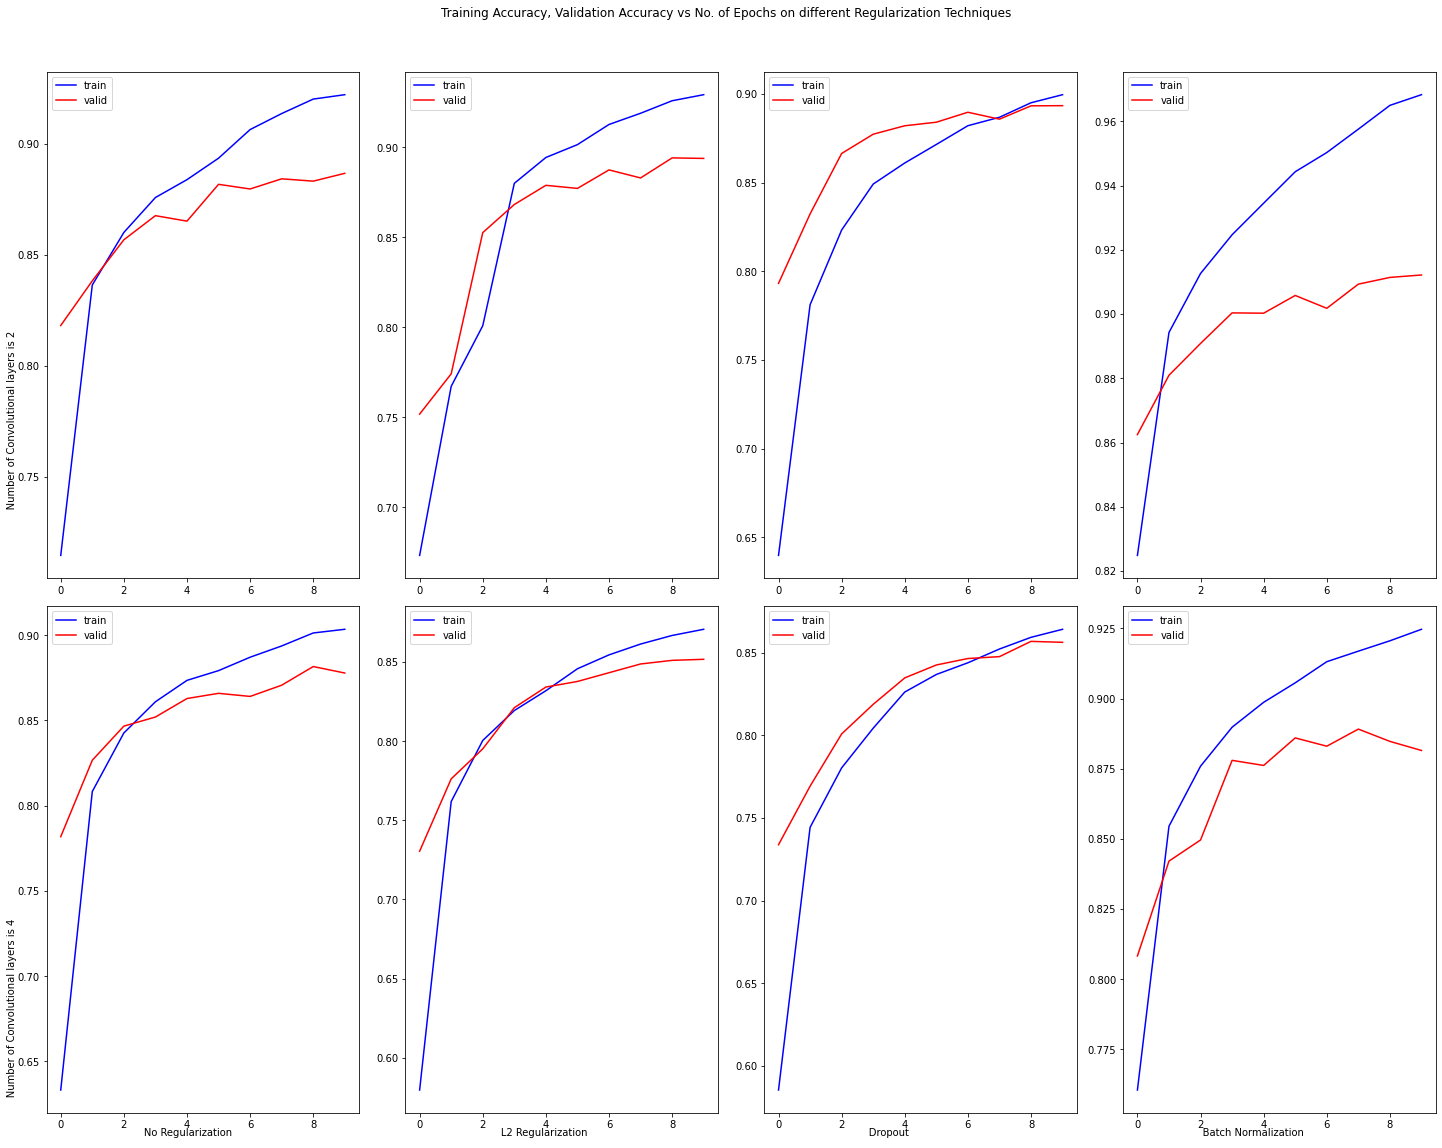

In [ ]:
# Plots

import matplotlib.pyplot as plt

figure, axis = plt.subplots(2, 4,figsize=(20,15))

axis[0, 0].plot(model1.history["accuracy"], color = "blue", label = "train")
axis[0, 0].plot(model1.history["val_accuracy"], color = "red", label = "valid")
axis[0,0].legend()

axis[0, 1].plot(model2.history["accuracy"], color = "blue", label = "train")
axis[0, 1].plot(model2.history["val_accuracy"], color = "red", label = "valid")
axis[0,1].legend()

axis[0, 2].plot(model3.history["accuracy"], color = "blue", label = "train")
axis[0, 2].plot(model3.history["val_accuracy"], color = "red", label = "valid")
axis[0,2].legend()

axis[0, 3].plot(model4.history["accuracy"], color = "blue", label = "train")
axis[0, 3].plot(model4.history["val_accuracy"], color = "red", label = "valid")
axis[0,3].legend()

axis[1, 0].plot(model5.history["accuracy"], color = "blue", label = "train")
axis[1, 0].plot(model5.history["val_accuracy"], color = "red", label = "valid")
axis[1,0].legend()

axis[1, 1].plot(model6.history["accuracy"], color = "blue", label = "train")
axis[1, 1].plot(model6.history["val_accuracy"], color = "red", label = "valid")
axis[1,1].legend()

axis[1, 2].plot(model7.history["accuracy"], color = "blue", label = "train")
axis[1, 2].plot(model7.history["val_accuracy"], color = "red", label = "valid")
axis[1,2].legend()

axis[1, 3].plot(model8.history["accuracy"], color = "blue", label = "train")
axis[1, 3].plot(model8.history["val_accuracy"], color = "red", label = "valid")
axis[1,3].legend()
  
plt.tight_layout()
figure.text(0.08, 0.005, '       No Regularization                                                                                      L2 Regularization                                                                                          Dropout                                                                                              Batch Normalization', ha='left')
figure.text(0.0005, 0.00005, '              Number of Convolutional layers is 4                                                                                                                                   Number of Convolutional layers is 2', va='bottom', rotation='vertical')
figure.suptitle('Training Accuracy, Validation Accuracy vs No. of Epochs on different Regularization Techniques',y=1.05)
plt.show()

In [ ]:
# Train a new model

X_new = np.concatenate([X_train,X_valid])
y_new = np.concatenate([y_train, y_valid])

# Train using Model 7

import time

start = time.time()

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import Dropout

model_new = Sequential()

model_new.add(Conv2D(32, kernel_size = 6, activation = 'relu', input_shape = (28,28,1),  kernel_regularizer = regularizers.l2(0.00001)))
model_new.add(MaxPooling2D(pool_size=(2,2)))
model_new.add(Conv2D(32, kernel_size = 6, activation = 'relu', input_shape = (28,28,1), kernel_regularizer = regularizers.l2(0.00001)))
model_new.add(MaxPooling2D(pool_size=(2,2)))
model_new.add(Flatten())
model_new.add(Dense(100, activation = 'relu'))
model_new.add(Dropout(0.1))
model_new.add(Dense(10, activation = "softmax"))

model_new.summary()

model_new.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model7 = model_new.fit(X_new, y_new, epochs = 10, batch_size = 500,verbose=0)

end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 23, 23, 32)        1184      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 32)          36896     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               28900     
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 100)              

In [ ]:
# Evaluate the model on test set 
score = model_new.evaluate(X_test, y_test, verbose = 0)
print("Test loss: %.4f" % score[0])
print("Test accuracy: %.2f" % (score[1] * 100.0))

Test loss: 0.3365
Test accuracy: 87.91


2) (a)

conv2d_12 (6, 6, 1, 32)


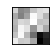

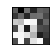

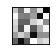

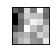

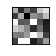

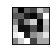

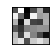

In [ ]:
## Visualization of first convolutional filters for first conv layer

model = model_new

#get the filters of the first conv layer
layer = model.layers[0]
filters, bias = layer.get_weights()
print(layer.name, filters.shape)

# normalize filter values between 0 and 1 for visualization
filter_min, filter_max = filters.min(), filters.max()
filters = (filters-filter_min) / (filter_max - filter_min)

n_filters = 7; ix = 1
for i in range(n_filters):
  f = filters[:, :, :, i]
  
  plt.figure(figsize=(5,5),dpi = 80)
  
  for j in range(1):
    ax = plt.subplot(n_filters, 2, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f[:, :, j], cmap = "gray")
    ix +=1

plt.show()

conv2d_13 (6, 6, 32, 32)


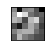

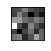

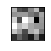

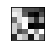

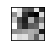

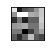

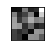

In [ ]:
## Visualization of convolutional filters for second conv layer

model = model_new

#get the filters of the second conv layer
layer = model.layers[2]
filters, bias = layer.get_weights()
print(layer.name, filters.shape)

# normalize filter values between 0 and 1 for visualization
filter_min, filter_max = filters.min(), filters.max()
filters = (filters-filter_min) / (filter_max - filter_min)

n_filters = 7; ix = 1
for i in range(n_filters):
  f = filters[:, :, :, i]
  
  plt.figure(figsize=(5,5))
  for j in range(1):
    ax = plt.subplot(n_filters,2, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f[:, :, j], cmap = "gray")
    ix +=1

plt.show()
